In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
diamonds = shuffle(sns.load_dataset('diamonds'))

In [41]:
x = diamonds[['carat', 'cut', 'color', 'clarity']]
y = diamonds['price']

In [42]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
20655,1.53,0,6,3,62.4,54.0,8943,7.34,7.38,4.59
37649,0.41,2,0,3,63.4,56.0,991,4.70,4.76,3.00
14728,0.30,3,3,3,63.1,56.0,605,4.24,4.26,2.68
28763,0.31,1,2,3,61.8,60.0,680,4.35,4.39,2.70
2197,0.90,2,1,6,59.5,61.0,3139,6.24,6.30,3.73
...,...,...,...,...,...,...,...,...,...,...
28172,0.36,1,4,5,61.3,57.0,665,4.65,4.61,2.84
13799,1.64,1,6,6,63.0,58.0,5624,7.54,7.49,4.74
2312,0.73,3,2,2,58.2,63.0,3166,5.87,6.01,3.46
26049,1.59,1,1,4,62.3,59.0,15249,7.43,7.38,4.61


In [43]:
cleanup= {"cut":{"Ideal": 0, "Premium":1, "Very Good":2, "Good":3, "Fair":4},
         "color":{"D":0, "E":1,"F":2, "G":3, "H":4, "I":5, "J":6},
         "clarity":{"IF":0, "VVS1":1, "VVS2":2, "VS1":3, "VS2":4, "SI1":5, "SI2":6, "I1":7}}

In [44]:
diamonds.replace(cleanup, inplace=True)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [46]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [47]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [54]:
predictions = lm.predict(x_test)
predictions

array([ 7017.68578982,  9702.93492741,  6673.85988257, ...,
        3649.3303385 ,  9119.15166548, 11719.46869686])

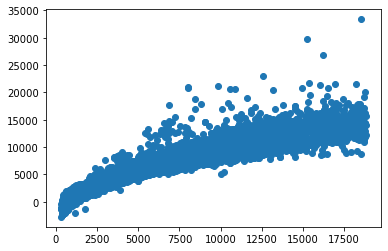

In [55]:
plt.scatter(y_test, predictions)

In [49]:
print("Score:", lm.score(x_test, y_test))
#look at me! 90% accurate!

Score: 0.9019607709050739


In [56]:
metrics.mean_absolute_error(y_test, predictions)

855.2326362277321

In [57]:
metrics.mean_squared_error(y_test, predictions)

1541449.4469399347

In [53]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))
#that feels like a lot of error

1241.5512260635624

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
kfold = KFold(5, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 53937 53938 53939], test: [   10    12    23 ... 53906 53911 53913]
train: [    0     1     4 ... 53936 53938 53939], test: [    2     3     8 ... 53934 53935 53937]
train: [    1     2     3 ... 53937 53938 53939], test: [    0    26    29 ... 53922 53933 53936]
train: [    0     2     3 ... 53937 53938 53939], test: [    1     4     5 ... 53927 53930 53931]
train: [    0     1     2 ... 53935 53936 53937], test: [    9    14    15 ... 53929 53938 53939]


D:\AnacondaDATASCI\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [62]:
print(cross_val_score(lm, x,y, cv=3))
#it seems as if each model is about the same for accuracy

[0.90597918 0.90227278 0.90405142]
